## Exercice 1 : Les bases

#### 1.1

Dans un système classique binaire, l'information est représentée par des bits, qui peuvent avoir l'une des deux valeurs possibles: 0 ou 1. 
Chaque bit est la plus petite unité d'information. En fonction du nombre de bits, on peut représenter différentes quantités d'information:

- 1 bit: 2 possibilités (0 ou 1)
- 2 bits: 4 possibilités (00, 01, 10, 11)
- 3 bits: 8 possibilités (000, 001, ..., 111)
- ...
- \(n\) bits: \(2^n\) possibilités

#### 1.2. 

- **NOT**
  - NOT(0) = 1
  - NOT(1) = 0

- **AND**
  - 0 AND 0 = 0
  - 0 AND 1 = 0
  - 1 AND 0 = 0
  - 1 AND 1 = 1

- **OR**
  - 0 OR 0 = 0
  - 0 OR 1 = 1
  - 1 OR 0 = 1
  - 1 OR 1 = 1

- **XOR** (OU exclusif)
  - 0 XOR 0 = 0
  - 0 XOR 1 = 1
  - 1 XOR 0 = 1
  - 1 XOR 1 = 0

### 2. 

Les états possibles d'un qubit sont représentés par la notation:

\[ |ψ⟩ = 𝛼 |0⟩ + 𝛽 |1⟩ \]

où:
- \( |0⟩ \) est l'état de base (0 dans le système binaire classique).
- \( |1⟩ \) est l'état excité (1 dans le système binaire classique).
- \( 𝛼 \) et \( 𝛽 \) sont des coefficients complexes tels que \( |𝛼|^2 + |𝛽|^2 = 1 \). Ils déterminent la probabilité de mesurer le qubit dans l'état \( |0⟩ \) ou \( |1⟩ \), respectivement.

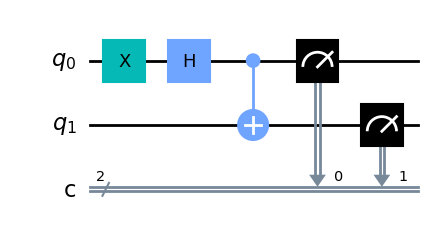

In [33]:
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_state_city

# Créer un circuit pour générer un état de Bell
qc = QuantumCircuit(2,2)
qc.x(0)
qc.h(0)
qc.cx(0, 1)

qc.measure([0,1],[0,1])

qc.draw('mpl')

# Ex2 Les portes (opérations quantiques) 

1.1. H (Hadamard)
La porte Hadamard
∣
0
⟩
∣0⟩ ou 
∣
1
⟩
∣1⟩, cette porte le place dans une superposition des deux états.

1.2. Matrice de passage pour H (Hadamard) :

1 & 1 \\
1 & -1 \\
\end{bmatrix} \]
---

**Proposition de deux circuits pour SWAP**
On a besoin d'au moins trois portes pour cela. 
La séquence est : CNOT(qubit1, qubit2), CNOT(qubit2, qubit1), CNOT(qubit1, qubit2). 
swap=CNOT01 CNOT10 CNOT01  
F=CCNOT01 CCNOT02 CCNOT01

In [8]:
import numpy as np
from qiskit import QuantumCircuit

In [9]:
circ = QuantumCircuit(3)

In [10]:
circ.draw()

q_0: 
     
q_1: 
     
q_2:

In [11]:
circ.x(0)
circ.h(0)
circ.h(1)
circ.h(2)
circ.cx(0,1)
circ.cx(0,2)

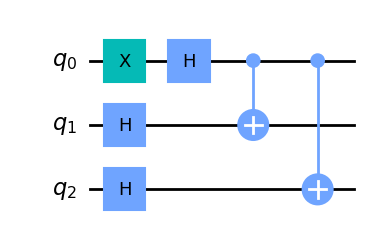

In [12]:
circ.draw('mpl')

In [13]:
from qiskit.quantum_info import Statevector

# Set the initial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**3)

state.draw('latex')

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')


<IPython.core.display.Latex object>

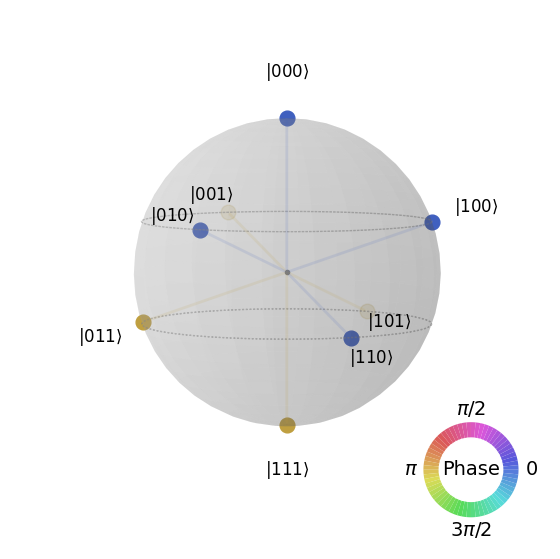

In [14]:
state.draw('qsphere')

In [15]:
from qiskit.visualization import array_to_latex,plot_state_qsphere, plot_state_city

#Alternative way of representing in latex
array_to_latex(state)

<IPython.core.display.Latex object>

In [21]:
from qiskit import Aer,transpile

# Visualisation sur le simulateur
backend = Aer.get_backend('statevector_simulator')

#Create a Quantum Program for execution
job = backend.run(circ)
outputstate = job.result().get_statevector(circ)

#outputstate = result.get_statevector(qc)
print(outputstate)


#compiled_circuit = transpile(qc, simulator)
#result = simulator.run(compiled_circuit).result()
#statevector = result.get_statevector()
#plot_state_qsphere(statevector)

Statevector([ 0.35355339-4.32978028e-17j, -0.35355339+4.32978028e-17j,
              0.35355339-4.32978028e-17j, -0.35355339+4.32978028e-17j,
              0.35355339-4.32978028e-17j, -0.35355339+4.32978028e-17j,
              0.35355339-4.32978028e-17j, -0.35355339+4.32978028e-17j],
            dims=(2, 2, 2))


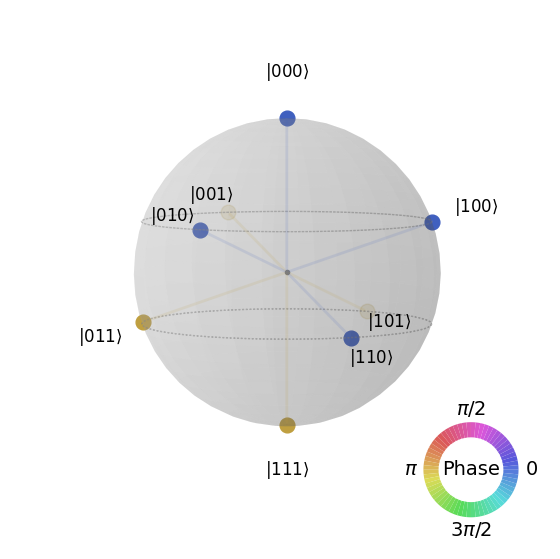

In [22]:
plot_state_qsphere(outputstate)

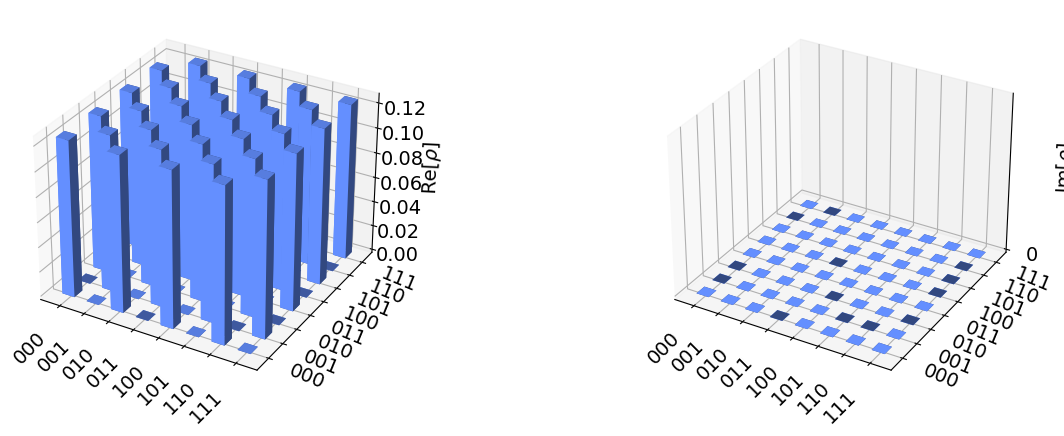

In [23]:
plot_state_city(outputstate)

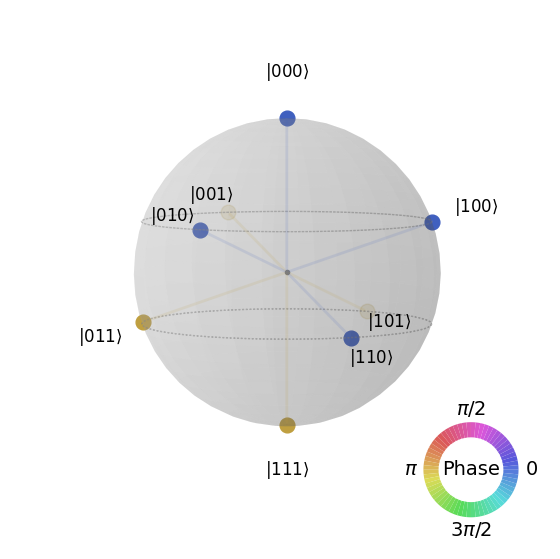

In [26]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circ, simulator)
result = simulator.run(compiled_circuit).result()
statevector = result.get_statevector()
plot_state_qsphere(statevector)

# Ex3 Mésurer un état de Bell

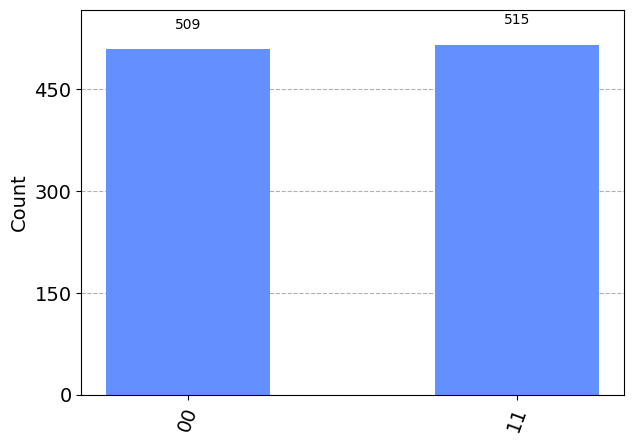

In [25]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Créer un état de Bell
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)

# Mesurer les qubits
circuit.measure_all()

simulator = AerSimulator()
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [27]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor 
# Get the API token in 
# https://quantum-computing.ibm.com/ 
IBMQ.save_account("c38a9861b2124a47350812b6df92f2a0ee8a42423374cadbcb1d9615e559551e2f8c7a9a8af85754d42c54b5e465b008f62eaefc0125fc1ab02d51b1d71696f2") 
Provider = IBMQ.load_account()  

#Backend class interfacing with an IBM Quantum Experience device (= ibm_quito). 
backend = provider.get_backend('ibm-quito')  

optimized_circuit = qiskit.transpile(circuit, backend) 
optimized_circuit.draw()  

# run in real hardware 
job = backend.run(optimized_circuit) 
retrieved_job = backend.retrieve_job(job.job_id()) 
result = retrieved_job.result() 
print(result.get_counts()) 

MissingOptionalLibraryError: "The 'qiskit-ibmq-provider' library is required to use 'IBMQ provider'. You can install it with 'pip install qiskit-ibmq-provider'."